# email spam classifier -nlp project

In [4]:
import numpy as np
import pandas as pd

In [6]:
df =pd.read_csv('email_spam.csv')

In [8]:
df.sample(15)


,Category,Message
5459,ham,If you hear a loud scream in about &lt;#&gt; m...
1807,spam,Todays Voda numbers ending 1225 are selected t...
157,ham,I'm leaving my house now...
4897,ham,2 and half years i missed your friendship:-)
3908,ham,No that just means you have a fat head
1869,ham,Today my system sh get ready.all is well and i...
5401,ham,Babes I think I got ur brolly I left it in Eng...
2843,ham,aathi..where are you dear..
2894,ham,K I'll be sure to get up before noon and see w...
507,ham,"Maybe westshore or hyde park village, the plac..."


In [172]:
df.shape

(5572, 2)

# basic data cleaning



In [174]:
# checking if there any null values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [176]:
# dataset dosen't have any null values, so no need of dropping

In [178]:
#applying labelEncoder ( to change ham/spam to 0/1 respectively)
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()


In [180]:
encode.fit_transform(df['Category'])

array([0, 0, 1, ..., 0, 0, 0])

In [182]:
df['Category'] = encode.fit_transform(df['Category'])

In [184]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [186]:
#checking missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [188]:
# checking duplicate values
df.duplicated().sum()

415

In [190]:
# removing duplicates
df= df.drop_duplicates(keep='first')

In [192]:
df.duplicated().sum()

0

In [194]:
df.shape

(5157, 2)

# EDA



In [196]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [198]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [200]:
# to represt ham and spam in our datasets betterly we are representing it in form of pi charts

([<matplotlib.patches.Wedge at 0x21862aa6750>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.6'),
  Text(0.5548334056198901, -0.22838540235364085, '12.4')])

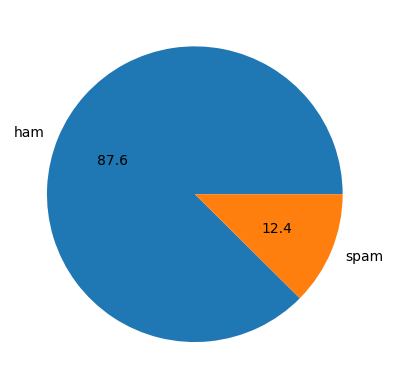

In [202]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.1f") 


In [204]:
## data is imbalanced (there is more ham and very less spam) ##

In [206]:
import nltk

In [208]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [209]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [210]:
# no_characters        :  length of each message in terms of no. of characters
df['no_characters'] = df['Message'].apply(len)

In [211]:
df.head()


,Category,Message,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [212]:
# no_words   : we use (nltk word_tokenization function) to break the message into words)
df['no_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [213]:
df.head()

,Category,Message,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [214]:
# no_sentence   : sent_tokenize function breaks messages into parts of sentences.
df['no_sentence'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [215]:
df.head()

,Category,Message,no_characters,no_words,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [216]:
df[['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [217]:
#using this describe function we can seperate spam and ham emails
# for spam (1)
df[df['Category'] ==1][['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [218]:
# for_ham (0)    ( spam messages have more no of characters/words/sentences than ham)
df[df['Category'] ==0][['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [219]:
# showing the difference in characters in spam and ham through histogram plots
import seaborn as sns

C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='no_characters', ylabel='Count'>

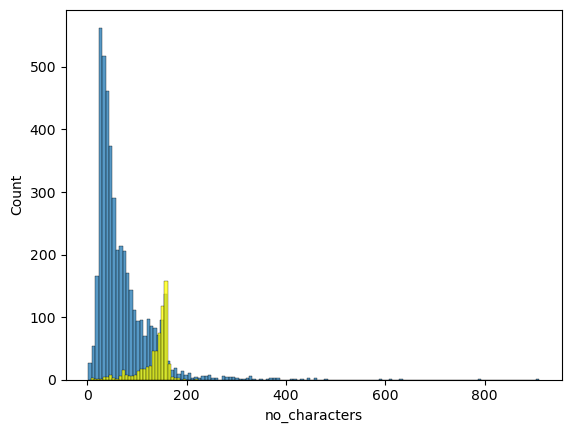

In [220]:
sns.histplot(df[df['Category']==0]['no_characters'])
sns.histplot(df[df['Category']==1]['no_characters'],color='yellow')

# data preprocessing



In [222]:
# lower case
def transform_Message(Message):
    Message = Message.lower()
   #tokenisation
    Message = nltk.word_tokenize(Message)

    # now text is a list, so we run a loop
    y=[]
    
    for i in Message:
        if i.isalnum():  # if i is alphanumeric it gets appended
            y.append(i)
     #removal of stopwords and punctuations
    Message = y[:]  # Use y here, which contains alphanumeric words
    y.clear()
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            #lemmatization 
    text = y[:]  # Make a copy of y before clearing it for stemming
    y.clear()
    for i in text:  # Use text, not Message here
        y.append(ps.stem(i))
         
    return " ".join(y)




In [416]:
transform_Message('I am working on NLP project on Emails ....%')

'work nlp project email'

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [420]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [422]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('hiding')


'hide'

In [424]:
df['Message'][244]

"Although i told u dat i'm into baig face watches now but i really like e watch u gave cos it's fr u. Thanx 4 everything dat u've done today, i'm touched..."

In [426]:
transform_Message("Although i told u dat i'm into baig face watches now but i really like e watch u gave cos it's fr u. Thanx 4 everything dat u've done today, i'm touched...")

'although told u dat baig face watch realli like e watch u gave co fr thanx 4 everyth dat u done today touch'

In [428]:
df['transformed_Message'] =df['Message'].apply(transform_Message)

In [429]:
df.head()

,Category,Message,no_characters,no_words,no_sentence,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [430]:


from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,min_font_size=10,background_color='black')

In [431]:
# concatanates the entire text into one sting seperated by spaces
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_Message'].str.cat(sep=" "))

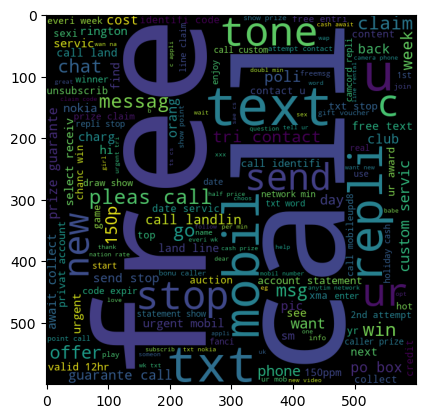

In [432]:
# shows the common words usd in spam emails
plt.imshow(spam_wc)

In [433]:
ham_wc = wc.generate(df[df['Category'] == 0]['transformed_Message'].str.cat(sep=" "))

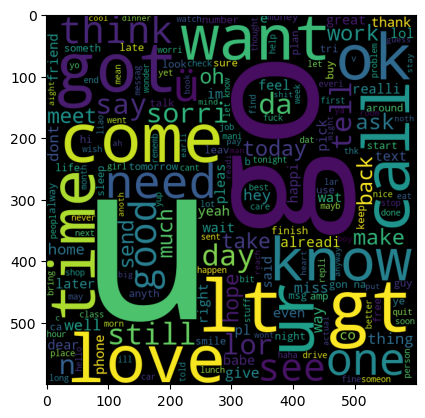

In [434]:
# shows the common words used in ham mails 
plt.imshow(ham_wc)

In [435]:
df.head()

,Category,Message,no_characters,no_words,no_sentence,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [436]:
# converts message into words in list form
spam_corpus = []

for msg in df[df['Category'] == 1]['transformed_Message'].tolist():  
    for word in msg.split(): 
        spam_corpus.append(word) 


In [437]:
len(spam_corpus)

9781

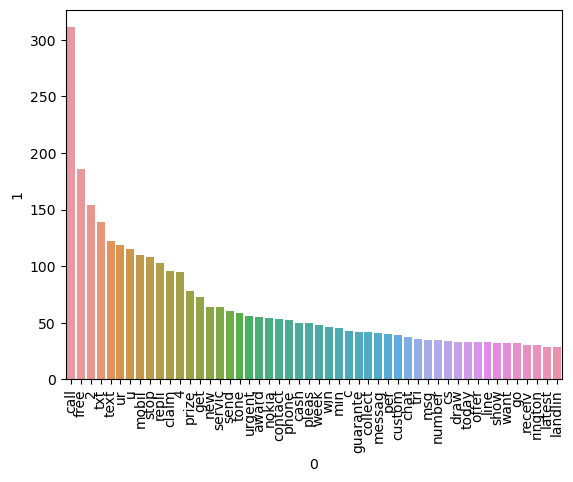

In [438]:
#top 50 most occoured words in spam  mails represented as bar plot
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')

plt.show()

In [439]:
ham_corpus = []

for msg in df[df['Category'] == 0]['transformed_Message'].tolist():  
    for word in msg.split(): 
        ham_corpus.append(word) 



In [440]:
len(ham_corpus)

35940

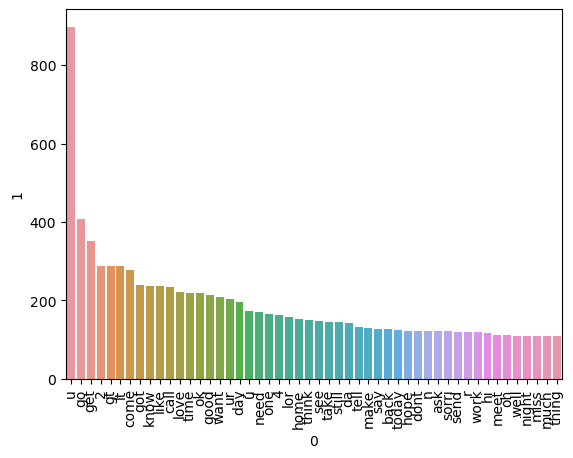

In [441]:
#top 50 most occoured words in ham mails represented as bar plot
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(50))[0], 
            y=pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

# feature engineering




In [443]:
# to convert input (transformed_messages) into vectors we use naivebayes and also Tfid

In [809]:
#for vectorising
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) # best result will come at 3000 only for tfidf 

In [813]:
X= tfidf.fit_transform(df['transformed_Message']).toarray()


In [1067]:
X.shape

(5157, 3002)

In [1069]:
y = df['Category'].values

In [1071]:
y


array([0, 0, 1, ..., 0, 0, 0])

# Data modeling





In [1074]:
from sklearn.model_selection import train_test_split


In [1076]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [1078]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [1080]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()

In [1082]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8727390180878553
[[1177  174]
 [  23  174]]
0.5


In [1083]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9722222222222222
[[1348    3]
 [  40  157]]
0.98125


In [1084]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)  # Corrected to use 'bnb' instead of 'mnb'
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9806201550387597
[[1348    3]
 [  27  170]]
0.9826589595375722


In [1087]:
#tfidf --> MNB

In [1088]:
# models from classificaton algorithms (tested)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [1089]:
# made objects for all ml models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [1094]:
#keys: algorithm names, values: objects ( created dictionaries)
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [1096]:
# create a  function which has classifier and training,testing data and caluculate precission and accuracy 

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [1098]:
#example
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8727390180878553, 0.0)

In [1099]:
# create a  function which has classifier and training,testing data and caluculate precission and accuracy 

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [1100]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8727390180878553, 0.0)

In [1101]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8727390180878553
Precision -  0.0
For  KN
Accuracy -  0.896640826873385
Precision -  0.9512195121951219
For  NB
Accuracy -  0.9722222222222222
Precision -  0.98125
For  DT
Accuracy -  0.9541343669250646
Precision -  0.95
For  LR
Accuracy -  0.9599483204134367
Precision -  0.9655172413793104
For  RF
Accuracy -  0.9709302325581395
Precision -  0.9935064935064936
For  AdaBoost
Accuracy -  0.9599483204134367
Precision -  0.8901734104046243
For  BgC
Accuracy -  0.9709302325581395
Precision -  0.9418604651162791
For  ETC
Accuracy -  0.9767441860465116
Precision -  0.9938650306748467
For  GBDT
Accuracy -  0.9502583979328165
Precision -  0.9225352112676056
For  xgb
Accuracy -  0.9715762273901809
Precision -  0.9693251533742331


In [1102]:
# we are storing these values in a dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [1103]:
performance_df


,Algorithm,Accuracy,Precision
8,ETC,0.976744,0.993865
5,RF,0.970930,0.993506
2,NB,0.972222,0.981250
10,xgb,0.971576,0.969325
4,LR,0.959948,0.965517
1,KN,0.896641,0.951220
3,DT,0.954134,0.950000
7,BgC,0.970930,0.941860
9,GBDT,0.950258,0.922535
6,AdaBoost,0.959948,0.890173


In [1104]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [1105]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.976744
1,RF,Accuracy,0.970930
2,NB,Accuracy,0.972222
3,xgb,Accuracy,0.971576
4,LR,Accuracy,0.959948
5,KN,Accuracy,0.896641
6,DT,Accuracy,0.954134
7,BgC,Accuracy,0.970930
8,GBDT,Accuracy,0.950258
9,AdaBoost,Accuracy,0.959948


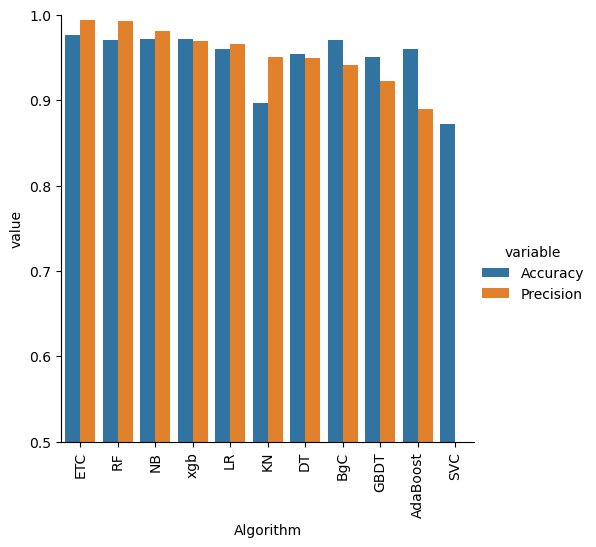

In [1106]:

# plotted a graph for accuracy and precession score ( so that we can know which algorithm to use ie which has more precission score and also a good accuracy score)
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()




# MODEL IMPROVEMENT


In [1108]:
# i had changed the max_features parameters of TFidfvectoriser to 3000.

In [1110]:
temp_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [1111]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [1112]:
new_df_scaled=performance_df.merge(temp_df,on='Algorithm')

In [1113]:
temp_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [1114]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,ETC,0.976744,0.993865,0.976744,0.993865,0.976744,0.993865
1,RF,0.970930,0.993506,0.970930,0.993506,0.970930,0.993506
2,NB,0.972222,0.981250,0.972222,0.981250,0.972222,0.981250
3,xgb,0.971576,0.969325,0.971576,0.969325,0.971576,0.969325
4,LR,0.959948,0.965517,0.959948,0.965517,0.959948,0.965517
5,KN,0.896641,0.951220,0.896641,0.951220,0.896641,0.951220
6,DT,0.954134,0.950000,0.954134,0.950000,0.954134,0.950000
7,BgC,0.970930,0.941860,0.970930,0.941860,0.970930,0.941860
8,GBDT,0.950258,0.922535,0.950258,0.922535,0.950258,0.922535
9,AdaBoost,0.959948,0.890173,0.959948,0.890173,0.959948,0.890173


In [1115]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [1116]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [1117]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [1118]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9670542635658915
Precision 1.0


In [1119]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [1120]:
from sklearn.ensemble import StackingClassifier

In [1121]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [1122]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9780361757105943
Precision 0.9453551912568307


In [ ]:
# here in this part of code, input email is asked, based on the input we give the result will be whether it is spam email or valid email

In [134]:
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Ensure required NLTK resources are downloaded
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Preprocessing function
def transform_Message(Message):
    ps = PorterStemmer()
    Message = Message.lower()
    # Tokenization
    Message = nltk.word_tokenize(Message)

    y = []
    for i in Message:
        if i.isalnum():  # Keep alphanumeric words
            y.append(i)

    # Removal of stopwords and punctuation
    Message = y[:]  # Use y here, which contains alphanumeric words
    y.clear()
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming (you can replace this with lemmatization if needed)
    text = y[:]  # Make a copy of y before clearing it for stemming
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Load the trained model and vectorizer
model = pickle.load(open('model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

# Function to classify email input
def classify_email(input_email):
    # Preprocess the input email
    processed_email = transform_Message(input_email)
    
    # Vectorize the email input
    vectorized_input = vectorizer.transform([processed_email])
    
    # Predict the class (1 = Spam, 0 = Ham)
    result = model.predict(vectorized_input)[0]
    
    # Output result
    if result == 1:
        return "Spam"
    else:
        return "Ham"  # Not Spam

# Ask for input and classify
input_email = input("Enter the email text to classify: ")
result = classify_email(input_email)
print(f"Prediction: {result}")


Enter the email text to classify:  you won a lottery amount of 5000


Prediction: Ham
